<img width="180" height="300" align ="left" src="img/iteso.jpg">

<body>
<head>
<div align="right">
    <h4><b>Proyecto #1: MNIST</b></h4>
</div>
</head>
<div align="right">
<br><br><br>         
<h5>César Villarreal Hernández, ie707560</h5>              
</div>
<div align="right">
<h5>Aprendizaje Máquina</h5>   
</div>
<div align="right">
<h5>Lunes 07 de Junio de 2021</h5>  
</div>
</body>

#### **I. Introducción**
---
**Planteamiento del problema:**

Identificar dígitos escritos a manos, utilizando el conjunto de datos MNIST. Se debe entrenar con 60,000 imágenes y probar con 10,000. También anticipe que se pueda probar una imagen aislada tomada de una cámara digital, dispositivo móvil o dibujada en una aplicación como el Paint, y la clasifique correctamente. 

Se deben utilizar al menos 5 clasificadores para mostrar los
resultados sobre los datos de prueba, asegúrese de incluir al menos:

1. Accuracy
2. Cross Validation
3. Confusion Matrix

Medidos sobre el conjunto de datos de prueba con las 10,000 imágenes. Muestre los resultados de los 5
clasificadores en una tabla en un cuaderno (notebook) de Jupyter, incluyendo comentarios y
explicaciones de las diferentes partes del código utilizando el lenguaje markdown. Atienda las
indicaciones de Laboratorios y Proyectos explicados en clase y que se encuentran en la presentación
con ese título.

Ahora, utilizando los mismos clasificadores, intercambie los datos para usar Fashion-MNIST, compare los
resultados entre los clasificadores y entre los dos conjuntos de datos, MNIST y Fashion-MNIST. ¿Cómo
variaron los resultados? ¿Se mantuvieron los resultados entre clasificadores entre los dos conjuntos de
datos?

#### **II. Marco Teórico**
--- 

El target data de la librería MNIST consiste en un conjunto de vectores de tipo one-hot que contiene la classificación de los digitos del 0 al 9.

Los datos de MNIST están almacenados de manera que tenemos 70,000 imagenes en total de tamaño (28x28). Las primeras 60,000 imagenes están diseñadas para el entrenamiento y las últimas 10,000 imagenes para realizar las pruebas. Por lo tanto, será necesario realizar una separación de los datos en diferentes vectores. 

El cross validation es un método estádistico para estimar la habilidad de los modelos de aprendizaje máquina.

#### **III. Desarrollo Experimental**
---

#### **Parte #1: MNIST**

Lo primero que se debe de realizar es importar el conjunto de datos de MNIST de la librería scikit-learn:

In [1]:
from sklearn.datasets import fetch_openml
import pandas 
import sys

mnist = fetch_openml('mnist_784',version=1)

In [2]:
from sklearn.datasets import fetch_openml
import pandas 
import sys
import numpy as np

mnist = fetch_openml('mnist_784',version=1)
n_tr = 60000
n_tst = 10000

# Separación de datos y target
x, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

# Obteniendo los vectores de las imágenes de entramiento
x_tr, y_tr = x[:n_tr], y[:n_tr]
# Obteniendo los vectores de las imágenes de prueba
x_tst, y_tst = x[n_tr:], y[n_tr:]

print(x_tr.shape)

(60000, 784)


Para verificar que los vectores generados fueron correctos, es necesario mostrar la imagen de un número. A continuación se realiza la prueba descrita:

El número esperado es 6


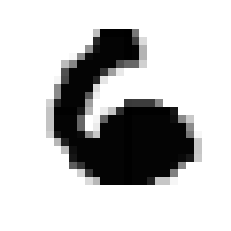

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

random_n_index = random.randrange(0, n_tr, 1)
imagen = x_tr[random_n_index]
print("El número esperado es %s" %  y_tr[random_n_index])
imagen = imagen.reshape(28,28)
plt.imshow(imagen, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

---

<h5><b>Creación de Modelos Clasificadores</b></h5>

---

##### a. Clasificador SGDC

In [73]:
import numpy as np

# Delete the comment sign "#" in the next two lines to use SGDClassifier
from sklearn.linear_model import SGDClassifier
model_SGDC = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

##### b. Clasificador Gaussiano

In [74]:
from sklearn.naive_bayes import GaussianNB
model_gaussian = GaussianNB()

##### c. Clasificador de regresión lógistica

In [75]:
from sklearn.svm import SVC
model_svc = SVC()

##### d. Clasificador Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(n_estimators=100)

##### e. Clasificador Linear Discriminant Analysis

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()

Ajuste de Modelos con Históricos---

<h5><b>Ajuste de Modelos con Históricos</b></h5>

---

##### a. Clasificador SGDC

In [78]:
model_SGDC.fit(x_tr, y_tr)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

##### b. Clasificador Gaussiano

In [79]:
model_gaussian.fit(x_tr, y_tr)

GaussianNB()

##### c. Clasificador SVC

In [80]:
model_svc.fit(x_tr, y_tr)

SVC()

##### d. Clasificador RandomForest

In [7]:
model_rf.fit(x_tr, y_tr)

RandomForestClassifier()

##### e. Clasificador Linear Discriminant Analysis

In [82]:
model_lda.fit(x_tr, y_tr)

LinearDiscriminantAnalysis()

---

<h5><b>Predicción de nuevos datos</b></h5>

---

##### a. Clasificador SGDC 

In [83]:
y_sgdc_predict = model_SGDC.predict(x_tst)
y_tst[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [84]:
y_sgdc_predict[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype='<U1')

##### b. Clasificador Gaussiano

In [85]:
y_gauss_predict = model_gaussian.predict(x_tst)
y_tst[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [86]:
y_gauss_predict[:7]

array(['9', '2', '1', '0', '9', '1', '8'], dtype='<U1')

##### c. Clasificador SVC

In [87]:
y_svc_predict = model_svc.predict(x_tst)
y_tst[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [88]:
y_svc_predict 

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

##### d. Clasificador Random Forest

In [89]:
y_rf_predict = model_rf.predict(x_tst)
y_tst[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [90]:
y_rf_predict

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

##### e. Clasificador Linear Discriminant Analysis

In [91]:
y_lda_predict = model_lda.predict(x_tst)
y_tst[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [92]:
y_lda_predict

array(['7', '2', '1', ..., '4', '5', '6'], dtype='<U1')

---

<h5><b>Visualización de resultados</b></h5>

---

##### a. Clasificador SGDC 

<ul>
<li><u>Cross Value</u></li>
</ul>

In [93]:
from sklearn.model_selection import cross_val_score
sgdc_cv = cross_val_score(model_SGDC, x_tr, y_tr, cv=3, scoring="accuracy")
sgdc_cv

array([0.8684 , 0.85975, 0.85475])

<ul>
<li><u>Precisión</u></li>
</ul>

In [94]:
from sklearn.metrics import accuracy_score
accuracy_sgdc = accuracy_score(y_tst, y_sgdc_predict)*100
print(("precisión SGDC = %.2f" % accuracy_sgdc)+' %') 

precisión SGDC = 88.80 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [95]:
from sklearn.metrics import confusion_matrix
cm_sgdc = confusion_matrix(y_tst, y_sgdc_predict)
print(cm_sgdc)

[[ 947    0    4    9    1    3   10    2    2    2]
 [   0 1069   32    6    0    4   10    2   10    2]
 [   7    0  923   28   10    1   17   11   31    4]
 [   3    0   18  924    3   26    3   14   10    9]
 [   3    0    3    5  919    0   16    4    4   28]
 [  14    2    6   72   18  698   28   10   22   22]
 [   7    2    6    6    3    9  924    0    1    0]
 [   5    4   24    6    6    2    0  955    3   23]
 [  15    7   28   73   21   43   34   24  715   14]
 [   9    4    2   17   60    9    1   94    7  806]]


##### b. Clasificador Gaussiano

<ul>
<li><u>Cross Value</u></li>
</ul>

In [96]:
from sklearn.model_selection import cross_val_score
cross_value_gauss = cross_val_score(model_gaussian, x_tr, y_tr, cv=3, scoring="accuracy")
print(cross_value_gauss)

[0.5592 0.5603 0.5572]


<ul>
<li><u>Precisión</u></li>
</ul>

In [97]:
from sklearn.metrics import accuracy_score
accuracy_gauss = accuracy_score(y_tst, y_gauss_predict)*100
print(("precisión Gauss = %.2f" % accuracy_gauss)+' %') 

precisión Gauss = 55.58 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [98]:
from sklearn.metrics import confusion_matrix
cm_gauss = confusion_matrix(y_tst, y_gauss_predict)
print(cm_gauss)

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


##### c. Clasificador SVC

<ul>
<li><u>Cross Value</u></li>
</ul>

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(model_svc, x_tr, y_tr, cv=3, scoring="accuracy")
print(cross_val_svc)

[0.977  0.9738 0.9739]


<ul>
<li><u>Precisión</u></li>
</ul>

In [100]:
from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(y_tst, y_svc_predict)*100
print(("precisión Gauss = %.2f" % accuracy_svc)+' %') 

precisión Gauss = 97.92 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [101]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_tst, y_svc_predict)
print(cm_svc)

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


##### d. Clasificador Random Forest

<ul>
<li><u>Cross Value</u></li>
</ul>

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_rf = cross_val_score(model_rf, x_tr, y_tr, cv=3, scoring="accuracy")
print(cross_val_rf)

[0.9647 0.9629 0.9656]


<ul>
<li><u>Precisión</u></li>
</ul>

In [103]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_tst, y_rf_predict)*100
print(("precisión RF = %.2f" % accuracy_rf)+' %') 

precisión RF = 97.02 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [104]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_tst, y_rf_predict)
print(cm_rf)

[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1124    3    2    0    2    2    0    2    0]
 [   6    0 1000    5    3    0    3    9    6    0]
 [   0    0   11  973    0    5    0    9   10    2]
 [   1    0    3    0  955    0    4    0    2   17]
 [   3    1    1   12    3  856    7    2    5    2]
 [   6    3    0    0    4    5  937    0    3    0]
 [   1    3   18    1    1    0    0  994    1    9]
 [   4    0    5    7    3    6    5    4  932    8]
 [   7    5    4   10   10    2    1    4    6  960]]


##### e. Clasificador Linear Discriminant Analysis

<ul>
<li><u>Cross Value</u></li>
</ul>

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_lda = cross_val_score(model_lda, x_tr, y_tr, cv=3, scoring="accuracy")
print(cross_val_lda)

[0.8584 0.8615 0.8673]


<ul>
<li><u>Precisión</u></li>
</ul>

In [106]:
from sklearn.metrics import accuracy_score
accuracy_lda = accuracy_score(y_tst, y_lda_predict)*100
print(("precisión lda = %.2f" % accuracy_lda)+' %') 

precisión lda = 87.30 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [107]:
from sklearn.metrics import confusion_matrix
cm_lda = confusion_matrix(y_tst, y_lda_predict)
print(cm_lda)

[[ 940    0    1    4    2   13    9    1    9    1]
 [   0 1096    4    3    2    2    3    0   25    0]
 [  15   32  816   34   21    5   37    9   57    6]
 [   5    5   25  883    4   25    3   16   29   15]
 [   0   12    6    0  888    4    7    2   10   53]
 [   8    8    4   44   12  735   15   10   38   18]
 [  12    8   11    0   25   29  857    0   16    0]
 [   2   30   15    9   22    2    0  864    4   80]
 [   7   27    8   27   20   53   10    6  790   26]
 [   9    7    1   13   63    6    0   37   12  861]]


---

<h5><b>Resumen de resultados</b></h5>

---

In [108]:
import pandas as pd
data = [[accuracy_sgdc, sgdc_cv], [accuracy_gauss, cross_value_gauss],[accuracy_svc,cross_val_svc],[accuracy_rf,cross_val_rf],[accuracy_lda,cross_val_lda]]
pd.DataFrame(data, columns=["Precisión", "Cross-Value"], index=["SCGD", "Gauss", "SVC", "Rain Forest", "LDA"])

Precisión                 Cross-Value
SCGD             88.80  [0.8684, 0.85975, 0.85475]
Gauss            55.58    [0.5592, 0.5603, 0.5572]
SVC              97.92     [0.977, 0.9738, 0.9739]
Rain Forest      97.02    [0.9647, 0.9629, 0.9656]
LDA              87.30    [0.8584, 0.8615, 0.8673]

---

<h5><b>Prueba con imagen dibujada</b></h5>

---

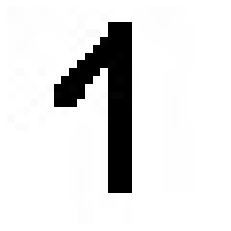

Predicted number = 1


In [8]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

# abrir imagen
im = Image.open("img/number_to_decode.jpg").convert('L')

# mostrar imagen
plt.imshow(im, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# obtener vector de la imagen
image_sequence = im.getdata()

# predicción del número utilizando predictor Rain Forest
y_rf_predict = model_rf.predict([image_sequence])
print("Predicted number = %s" % y_rf_predict[0])


#### **Parte #2: Fashion-MNIST**

In [2]:
from tensorflow import keras
import tensorflow
import pandas as pd
import numpy as np
# loading data

data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

X_train = np.array(data_train.drop("label",axis=1))
y_train = np.array(data_train["label"])

X_test = np.array(data_test.drop("label",axis=1))
y_test = np.array(data_test["label"])


trouser


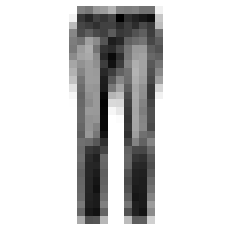

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

labels = {
    0: "t-shirt",
    1: "trouser",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle-boot"
}

random_n_index = random.randrange(0, 100, 1)
imagen = X_train[random_n_index]
label = labels[y_train[random_n_index]]
print("%s" % label)
imagen = imagen.reshape(28,28)
plt.imshow(imagen, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

---

<h5><b>Creación de Modelos Clasificadores</b></h5>

---

##### a. Clasificador SGDC

In [8]:
import numpy as np

# Delete the comment sign "#" in the next two lines to use SGDClassifier
from sklearn.linear_model import SGDClassifier
model_SGDC = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

##### b. Clasificador Gaussiano

In [9]:
from sklearn.naive_bayes import GaussianNB
model_gaussian = GaussianNB()

##### c. Clasificador SVC

from sklearn.svm import SVC
model_svc = SVC()##### c. Clasificador de regresión lógistica

In [46]:
from sklearn.svm import SVC

model_svc = SVC(gamma='auto',max_iter = 5000)

##### d. Clasificador Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(n_estimators=100)

##### e. Clasificador Linear Discriminant Analysis

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()

---

<h5><b>Ajuste de Modelos con Históricos</b></h5>

---

##### a. Clasificador SGDC

In [13]:
model_SGDC.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

##### b. Clasificador Gaussiano

In [14]:
model_gaussian.fit(X_train, y_train)

GaussianNB()

##### c. Clasificador SVC

In [ ]:
model_svc.fit(X_train, y_train)

##### d. Clasificador Random Forest

In [15]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

##### e. Clasificador Linear Discriminant Analysis

In [16]:
model_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

---

<h5><b>Predicción de nuevos datos</b></h5>

---

##### a. Clasificador SGDC

In [17]:
y_sgdc_predict = model_SGDC.predict(X_test)
y_test[:7]

array([0, 1, 2, 2, 3, 2, 8], dtype=int64)

In [18]:
y_sgdc_predict[:7]

array([0, 1, 2, 6, 3, 6, 8], dtype=int64)

##### b. Clasificador Gaussiano

In [19]:
y_gauss_predict = model_gaussian.predict(X_test)
y_test[:7]

array([0, 1, 2, 2, 3, 2, 8], dtype=int64)

In [20]:
y_gauss_predict[:7]

array([0, 1, 2, 2, 3, 6, 8], dtype=int64)

##### c. Clasificador SVC

In [48]:
y_svc_predict = model_svc.predict(X_test)
y_test[:7]

array([0, 1, 2, 2, 3, 2, 8], dtype=int64)

In [49]:
y_svc_predict[:7]

array([9, 1, 2, 9, 9, 9, 9], dtype=int64)

##### d. Clasificador Random Forest

In [21]:
y_rf_predict = model_rf.predict(X_test)
y_test[:7]

array([0, 1, 2, 2, 3, 2, 8], dtype=int64)

In [22]:
y_rf_predict[:7]

array([0, 1, 2, 2, 4, 6, 8], dtype=int64)

##### e. Clasificador Linear Discriminant Analysis

In [23]:
y_lda_predict = model_lda.predict(X_test)
y_test[:7]

array([0, 1, 2, 2, 3, 2, 8], dtype=int64)

In [24]:
y_lda_predict[:7]

array([0, 1, 2, 2, 3, 6, 8], dtype=int64)

---

<h5><b>Visualización de resultados</b></h5>

---

##### a. Clasificador SGDC

<ul>
<li><u>Cross Value</u></li>
</ul>

In [25]:
from sklearn.model_selection import cross_val_score
sgdc_cv = cross_val_score(model_SGDC, X_train, y_train, cv=3, scoring="accuracy")
sgdc_cv

array([0.7238 , 0.74735, 0.7489 ])

<ul>
<li><u>Precisión</u></li>
</ul>

In [26]:
from sklearn.metrics import accuracy_score
accuracy_sgdc = accuracy_score(y_test, y_sgdc_predict)*100
print(("precisión SGDC = %.2f" % accuracy_sgdc)+' %') 

precisión SGDC = 80.56 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [27]:
from sklearn.metrics import confusion_matrix
cm_sgdc = confusion_matrix(y_test, y_sgdc_predict)
print(cm_sgdc)

[[829   5  12  15   0   0 120   0  19   0]
 [ 12 971   1   8   0   1   6   0   0   1]
 [ 14   2 742   8  33   0 188   0  13   0]
 [102  23  10 814   9   0  28   0  11   3]
 [ 14   6 154  54 336   0 426   0  10   0]
 [  2   1   1   2   0 877   0  57  12  48]
 [165   3  72  25  18   0 696   0  21   0]
 [  0   0   0   0   0  21   0 889   4  86]
 [  4   0   4   7   4   8  29   4 939   1]
 [  0   0   0   0   1  12   0  22   2 963]]


##### b. Clasificador Gaussiano

<ul>
<li><u>Cross Value</u></li>
</ul>

In [28]:
from sklearn.model_selection import cross_val_score
cross_value_gauss = cross_val_score(model_gaussian, X_train, y_train, cv=3, scoring="accuracy")
print(cross_value_gauss)

[0.59945 0.5946  0.58915]


<ul>
<li><u>Precisión</u></li>
</ul>

In [29]:
from sklearn.metrics import accuracy_score
accuracy_gauss = accuracy_score(y_test, y_gauss_predict)*100
print(("precisión Gauss = %.2f" % accuracy_gauss)+' %') 

precisión Gauss = 59.14 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [30]:
from sklearn.metrics import confusion_matrix
cm_gauss = confusion_matrix(y_test, y_gauss_predict)
print(cm_gauss)

[[594  42  25 196  87   0  16   0  40   0]
 [  0 940  16  33   2   1   8   0   0   0]
 [  4   7 324  68 553   0  21   0  23   0]
 [  6 311   6 644  25   0   5   0   3   0]
 [  0  33  37 155 765   0   1   0   9   0]
 [  1   1   1   2   0 289   6 648  14  38]
 [113  32 103 236 432   0  38   0  46   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  1   2  17  79 161   3  22   3 711   1]
 [  0   0   0   1   0  27   2 328  11 631]]


##### c. Clasificador SVC

<ul>
<li><u>Cross Value</u></li>
</ul>

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(model_svc, X_train, y_train, cv=3, scoring="accuracy")
print(cross_val_svc)

<ul>
<li><u>Precisión</u></li>
</ul>

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(y_test, y_svc_predict)*100
print(("precisión Gauss = %.2f" % accuracy_svc)+' %') 

<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test, y_svc_predict)
print(cm_svc)

##### d. Clasificador Random Forest

<ul>
<li><u>Cross Value</u></li>
</ul>

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_rf = cross_val_score(model_rf, X_train, y_train, cv=3, scoring="accuracy")
print(cross_val_rf)

[0.87945 0.88065 0.8784 ]


<ul>
<li><u>Precisión</u></li>
</ul>

In [32]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_rf_predict)*100
print(("precisión RF = %.2f" % accuracy_rf)+' %') 

precisión RF = 88.42 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [33]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_rf_predict)
print(cm_rf)

[[852   0  11  34   3   1  86   0  13   0]
 [  2 972   5  15   1   1   4   0   0   0]
 [  9   1 798   8 124   0  50   0  10   0]
 [ 17   7  10 934  16   0  16   0   0   0]
 [  1   0  60  29 863   0  44   0   3   0]
 [  0   0   0   0   0 949   0  35   4  12]
 [165   1 100  28  74   0 617   0  15   0]
 [  0   0   0   0   0  17   0 932   0  51]
 [  1   1   6   0   2   2   8   2 978   0]
 [  0   0   0   0   0   7   1  43   2 947]]


##### e. Clasificador Linear Discriminant Analysis

<ul>
<li><u>Cross Value</u></li>
</ul>

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_lda = cross_val_score(model_lda, X_train, y_train, cv=3, scoring="accuracy")
print(cross_val_lda)

[0.8223  0.822   0.82015]


<ul>
<li><u>Precisión</u></li>
</ul>X_train

In [37]:
from sklearn.metrics import accuracy_score
accuracy_lda = accuracy_score(y_test, y_lda_predict)*100
print(("precisión lda = %.2f" % accuracy_lda)+' %') 

precisión lda = 82.56 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [38]:
from sklearn.metrics import confusion_matrix
cm_lda = confusion_matrix(y_test, y_lda_predict)
print(cm_lda)

[[768   0  17  71   1   3 123   0  17   0]
 [  3 940   9  36   0   1  11   0   0   0]
 [ 18   0 715   8 150   2  96   0  11   0]
 [ 21   4  17 871  26   3  58   0   0   0]
 [  0   1  78  24 788   1 105   0   3   0]
 [  1   0   1   0   0 890   1  68  12  27]
 [145   0 104  40  86   2 605   0  18   0]
 [  0   0   0   0   0  69   0 855   0  76]
 [  2   0   5  10   5  22  34   5 916   1]
 [  0   0   0   0   0  39   0  53   0 908]]


---

<h5><b>Resumen de resultados</b></h5>

---

In [39]:
import pandas as pd
data = [[accuracy_sgdc, sgdc_cv], [accuracy_gauss, cross_value_gauss],[accuracy_rf,cross_val_rf],[accuracy_lda,cross_val_lda]]
pd.DataFrame(data, columns=["Precisión", "Cross-Value"], index=["SCGD", "Gauss", "Rain Forest", "LDA"])

Precisión                 Cross-Value
SCGD             80.56   [0.7238, 0.74735, 0.7489]
Gauss            59.14  [0.59945, 0.5946, 0.58915]
Rain Forest      88.42  [0.87945, 0.88065, 0.8784]
LDA              82.56    [0.8223, 0.822, 0.82015]

---
#### **V. Conclusiones**
---

En conclusión, puedo afirmar que los principales aprendizajes de este laboratorio conciernen con el uso de diferentes clasificadores de manera que se realizó el entrenamiento y prueba de estos. Considero que me resultó bastante útil realizar este ejericio con diferentes clasificadores; me pude dar cuenta de que se obtienen diferentes desempeños al utilizar cada uno de estos. Este ejercicio será útil como introducción al aprendizaje máquina. Una vez que se tienen las herramientas, se puede realizar un análisis del problema que se quiere solucionar, y en este caso elegir el clasificador que sea más adecuado.


---

#### **VI. Repositorio del proyecto**

---


https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Proyectos/P1_MNIST

---

#### **VII. Video**

---


https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Proyectos/P1_MNIST/video